**Implied volatilities**

Option quotes for certain maturity dates are taken to back out the implied volatil‐ ities of these options and to plot them—a task option traders and risk managers, among others, are faced with on a daily basis.

**Monte Carlo simulation**

The evolution of a stock index over time is simulated via Monte Carlo techniques, selected results are visualized, and European option values are calculated. Monte Carlo simulation is a cornerstone for numerical option pricing as well as for risk management efforts involving value-at-risk calculations or credit value adjustments.



The financial and numerical tools needed are now complete—even if only roughly de‐ scribed—and we can have a look into the respective Python code that assumes the special case t = 0 

In [60]:
from math import log, sqrt, exp 
from scipy import stats

import math
from numpy import *
import numpy.random as npr
from random import gauss, seed
from time import time


import matplotlib.pyplot as plt 
%matplotlib inline

# Implied Volatilities

In [61]:
#
# Valuation of European call options in Black-Scholes-Merton model
# incl. Vega function and implied volatility estimation
# bsm_functions.py #
# Analytical Black-Scholes-Merton (BSM) Formula

In [62]:
# Analytical Black-Scholes-Merton (BSM) Formula
def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model. Analytical formula.
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate 
    sigma : float
        volatility factor in diffusion term
        
    Returns
    =======
    value : float
        present value of the European call option
    '''
   
    S0 = float(S0) 
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T)) 
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T)) 
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)) 
    # stats.norm.cdf --> cumulative distribution function
    #                    for normal distribution
    return value

In [63]:
# Vega function
def bsm_vega(S0, K, T, r, sigma):
    ''' Vega of European option in BSM model.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate 
    sigma : float
        volatility factor in diffusion term
        
    Returns
    =======
    vega : float
        partial derivative of BSM formula with 
        respect to sigma, i.e. Vega
        
        
    '''
    
    S0 = float(S0) 
    d1=(log(S0/K)+(r+0.5*sigma**2)*T/(sigma*sqrt(T)))
    vega = S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

In [64]:

def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Implied volatility of European call option in BSM model.
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate 
    sigma_est : float
        estimate of impl. volatility 
    it : integer
        number of iterations
    Returns
    ======= 
    simga_est : float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0)
                        / bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est    


In [65]:
seed(20000) 
t0 = time()

# Parameters
S0 = 100. # initial value
K = 105. # strike price
T = 1.0 # maturity
r = 0.05 # riskless short rate 
sigma = 0.2 # volatility
M = 50 # number of time steps
dt = T / M # length of time interval 
I = 250000 # number of paths

# Simulating I paths with M time steps
S=[]
for i in range(I):
    path = []
    for t in range(M + 1):
        if t==0: 
            path.append(S0)
        else:
            z = gauss(0.0, 1.0) 
            St=path[t-1]*exp((r-0.5*sigma**2)*dt
                                  + sigma * sqrt(dt) * z)
            path.append(St) 
    S.append(path)
    
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I

# Results output
tpy = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds %7.3f" % tpy)

European Option Value   7.999
Duration in Seconds  84.921


In [66]:
#
# Monte Carlo valuation of European call options with NumPy (log version) 
# mcs_full_vector_numpy.py
#
  # star import for shorter code
np.random.seed(20000) 
t0 = time()

# Parameters
S0=100.;K=105.;T=1.0;r=0.05;sigma=0.2 
M=50;dt=T/M;I=250000

# Simulating I paths with M time steps
S=S0*exp(cumsum((r-0.5*sigma**2)*dt 
                + sigma * math.sqrt(dt)
                    * random.standard_normal((M + 1, I)), axis=0)) 
# sum instead of cumsum would also do
  # if only the final values are of interest
S[0] = S0

# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

# Results output
tnp2 = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds %7.3f" % tnp2)

European Option Value   8.166
Duration in Seconds   1.842


In [67]:
S0 = 100 # initial value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws 
ST1=S0*np.exp((r-0.5*sigma**2)*T
        + sigma * np.sqrt(T) * npr.standard_normal(I))

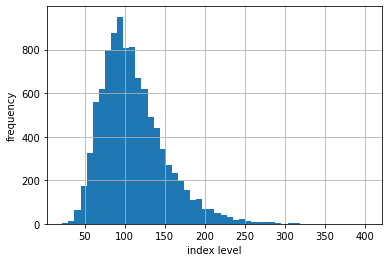

In [68]:
plt.hist(ST1, bins=50) 
plt.xlabel('index level')
plt.ylabel('frequency') 
plt.grid(True)